<a href="https://colab.research.google.com/github/dheerajpreetsingh/APMLP/blob/main/APMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
import statistics
import math
import dlib
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

"""desired_folder_path = '/content/drive/My Drive/APMLP'

!ln -s "$desired_folder_path" "/content/APMLP""""


Mounted at /content/drive


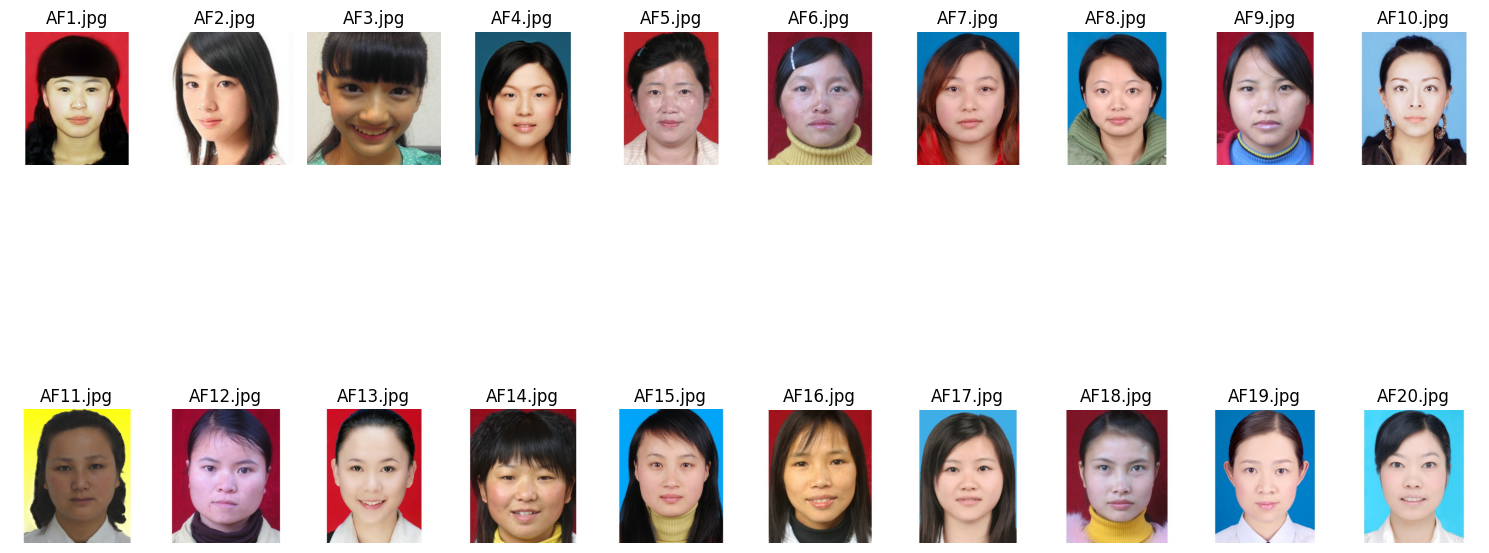

In [ ]:
fig , axs=plt.subplots(nrows=2,ncols=10,figsize=(15,10))
axs=axs.flatten()
for i in range(20):
  filepath="/content/APMLP/Data_Images/"+"AF"+str(i+1)+".jpg"
  img=Image.open(filepath)
  axs[i].imshow(img)
  axs[i].axis("Off")
  axs[i].set_title("AF"+str(i+1)+".jpg")
plt.tight_layout()
plt.show()

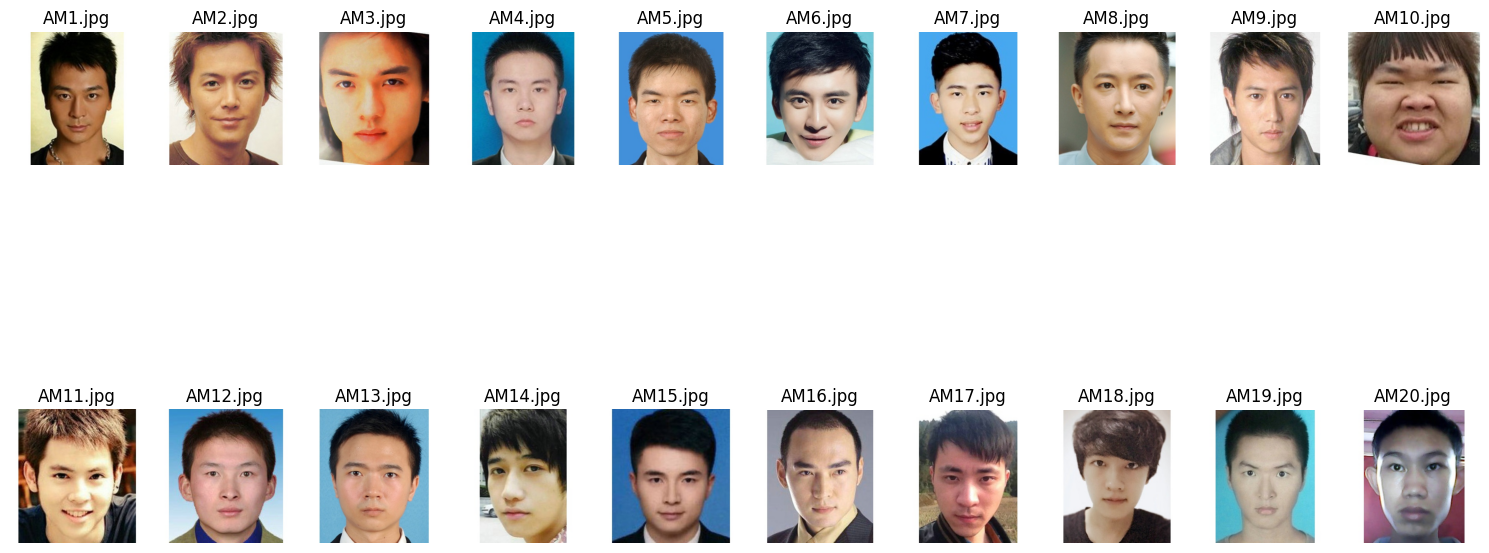

In [ ]:
fig , axs=plt.subplots(nrows=2,ncols=10,figsize=(15,10))
axs=axs.flatten()
for i in range(20):
  filepath="/content/APMLP/Data_Images/"+"AM"+str(i+1)+".jpg"
  img=Image.open(filepath)
  axs[i].imshow(img)
  axs[i].axis("Off")
  axs[i].set_title("AM"+str(i+1)+".jpg")
plt.tight_layout()
plt.show()

In [ ]:
dff=pd.read_csv("/content/APMLP/Rating_Female.csv", low_memory=False)
dff1=dff.drop("original Rating",axis=1)
dff1.head()

,Rater,Filename,Rating
0,1.0,AF1.jpg,2.0
1,2.0,AF1.jpg,3.0
2,3.0,AF1.jpg,2.0
3,4.0,AF1.jpg,1.0
4,5.0,AF1.jpg,3.0


In [ ]:
dfm=pd.read_csv("/content/APMLP/Rating_Male.csv", low_memory=False)
dfm1=dfm.drop("original Rating",axis=1)
dfm1.head()

,Rater,Filename,Rating
0,1.0,AM1.jpg,4.0
1,2.0,AM1.jpg,4.0
2,3.0,AM1.jpg,5.0
3,4.0,AM1.jpg,3.0
4,5.0,AM1.jpg,4.0


1
M


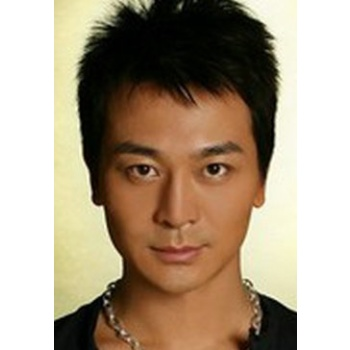

In [ ]:
Mn=input()
s=input()
res="A"+s+n+".jpg"

image_path = "/content/APMLP/Data_Images/"+res
img = Image.open(image_path)

display(img)

In [ ]:
dff2=dff1.dropna(how='all')
dff2

,Rater,Filename,Rating
0,1.0,AF1.jpg,2.0
1,2.0,AF1.jpg,3.0
2,3.0,AF1.jpg,2.0
3,4.0,AF1.jpg,1.0
4,5.0,AF1.jpg,3.0
...,...,...,...
119995,56.0,AF2000.jpg,3.0
119996,57.0,AF2000.jpg,4.0
119997,58.0,AF2000.jpg,3.0
119998,59.0,AF2000.jpg,4.0


In [ ]:
dfm2=dfm1.dropna(how='all')
dfm2

,Rater,Filename,Rating
0,1.0,AM1.jpg,4.0
1,2.0,AM1.jpg,4.0
2,3.0,AM1.jpg,5.0
3,4.0,AM1.jpg,3.0
4,5.0,AM1.jpg,4.0
...,...,...,...
119995,56.0,AM999.jpg,2.0
119996,57.0,AM999.jpg,1.0
119997,58.0,AM999.jpg,2.0
119998,59.0,AM999.jpg,3.0


In [ ]:
ndfm = dfm2.groupby('Filename')['Rating'].mean().reset_index()
ndfm

,Filename,Rating
0,AM1.jpg,3.950000
1,AM10.jpg,1.166667
2,AM100.jpg,2.016667
3,AM1000.jpg,2.766667
4,AM1001.jpg,2.300000
...,...,...
1995,AM995.jpg,2.700000
1996,AM996.jpg,2.050000
1997,AM997.jpg,2.550000
1998,AM998.jpg,2.583333


In [ ]:
ndff = dff2.groupby('Filename')['Rating'].mean().reset_index()
ndff

,Filename,Rating
0,AF1.jpg,2.333333
1,AF10.jpg,3.433333
2,AF100.jpg,2.900000
3,AF1000.jpg,3.966667
4,AF1001.jpg,3.733333
...,...,...
1995,AF995.jpg,3.016667
1996,AF996.jpg,3.366667
1997,AF997.jpg,3.733333
1998,AF998.jpg,3.350000


In [ ]:
def dist(a,b):
  return ((a[0]-b[0])**2)+((a[1]-b[1])**2)

In [ ]:
def calcangle(p1, p2, p3):
    angle_rad = math.atan2(p3[1] - p2[1], p3[0] - p2[0]) - math.atan2(p1[1] - p2[1], p1[0] - p2[0])
    angle_deg = math.degrees(angle_rad)
    return angle_deg

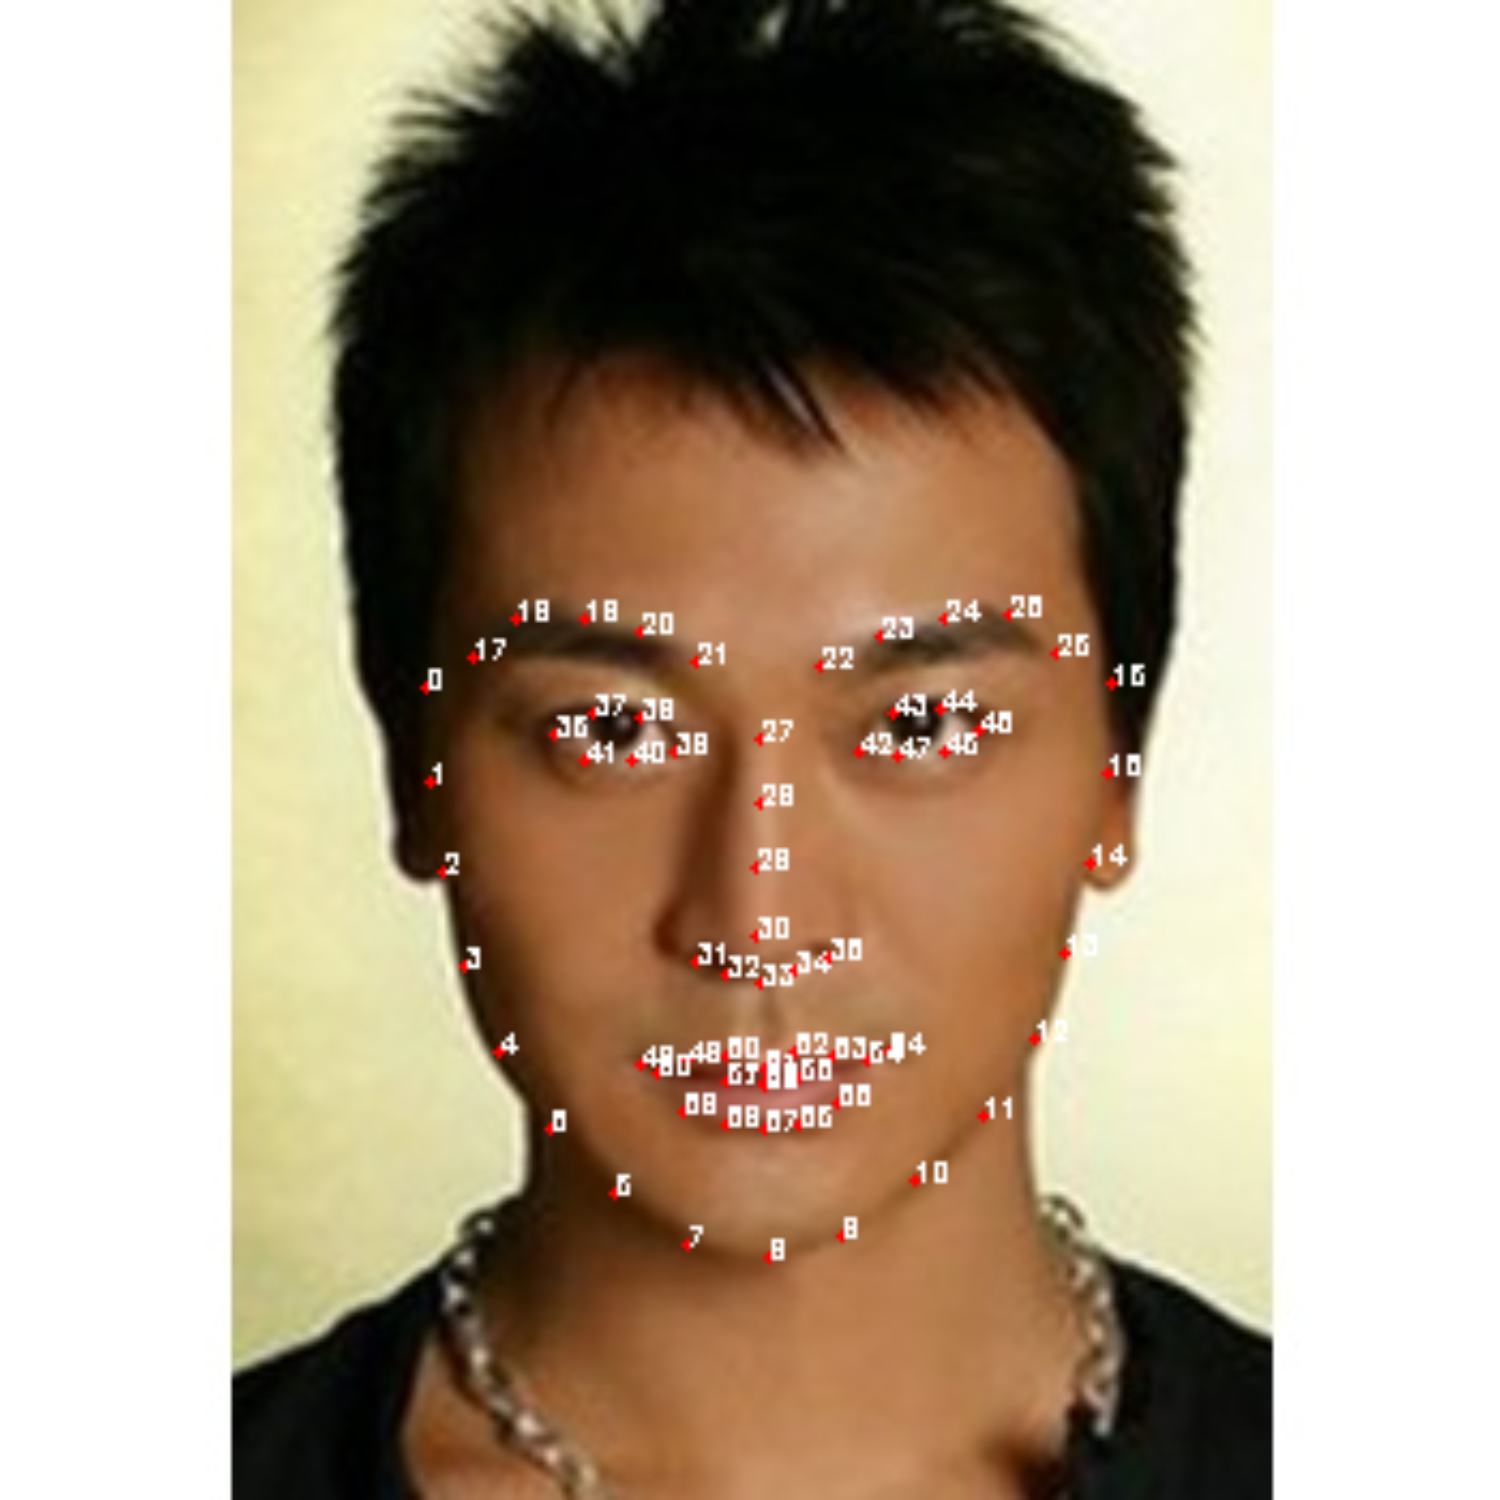

3249
1849
962
3373
256
290
800
809
114.5
101.0
833
914
1300
569.4
566
901
761.4
14645
25601
24968
22805
19609
15634
10210
4909
1300
141.00900595749454
112.59910498173501
120.822677643257
131.82016988013575
401
154.6378330510688
61.8648987045999
70.3978798835842
79.36675153879462
129.48286402101195
116.10964389793632


In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow


image=cv2.imread("/content/drive/MyDrive/APMLP/Data_Images/AM1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


face_detector=dlib.get_frontal_face_detector()
landmark_predictor=dlib.shape_predictor("/content/drive/MyDrive/APMLP/shape_predictor_68_face_landmarks.dat")

faces=face_detector(gray)

for face in faces:
    landmarks = landmark_predictor(gray, face)

    if landmarks.num_parts == 68:
        for point in range(68):
            x, y = landmarks.part(point).x, landmarks.part(point).y
            cv2.circle(image, (x, y), 0, (0, 0, 255), thickness=2)
            cv2.putText(image, str(point), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1)
    else:
        print("Error: Incorrect number of facial landmarks detected.")

    #Measuring Nose Length
    noseupperpt_27 = (landmarks.part(27).x, landmarks.part(27).y)
    noselowerpt_33 = (landmarks.part(33).x, landmarks.part(33).y)
    nose_len=dist(noseupperpt_27,noselowerpt_33)

    #Measuring Distance between eyes closest point
    lefteye_39 = (landmarks.part(39).x, landmarks.part(39).y)
    righteye_42 = (landmarks.part(42).x, landmarks.part(42).y)
    closesdistbweyes=dist(lefteye_39,righteye_42)

    #Measuring nose width
    nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
    nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
    nose_width=dist(nose_31,nose_35)

    #Measuring Lips width
    lips_48 = (landmarks.part(48).x, landmarks.part(48).y)
    lips_54 = (landmarks.part(54).x, landmarks.part(54).y)
    lips_width=dist(lips_48,lips_54)

    #Measuring Lips length left
    lips_50 = (landmarks.part(50).x, landmarks.part(50).y)
    lips_58 = (landmarks.part(58).x, landmarks.part(58).y)
    lips_len_left=dist(lips_50,lips_58)

    #Measuring Lips length right
    lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
    lips_56 = (landmarks.part(56).x, landmarks.part(56).y)
    lips_len_right=dist(lips_52,lips_56)

    #Measuring eyes width left
    eyes_36 = (landmarks.part(36).x, landmarks.part(36).y)
    eyes_39 = (landmarks.part(39).x, landmarks.part(39).y)
    eyes_width_left=dist(eyes_36,eyes_39)

    #Measuring eyes width right
    eyes_42 = (landmarks.part(42).x, landmarks.part(42).y)
    eyes_45 = (landmarks.part(45).x, landmarks.part(45).y)
    eyes_width_right=dist(eyes_42,eyes_45)

    #Measuring eyes length left
    eyes_37 = (landmarks.part(37).x, landmarks.part(37).y)
    eyes_41 = (landmarks.part(41).x, landmarks.part(41).y)
    eyes_38 = (landmarks.part(38).x, landmarks.part(38).y)
    eyes_40 = (landmarks.part(40).x, landmarks.part(40).y)
    eyes_length_left=(dist(eyes_37,eyes_41)+dist(eyes_38,eyes_40))/2

    #Measurind eyes length right
    eyes_43 = (landmarks.part(43).x, landmarks.part(43).y)
    eyes_47 = (landmarks.part(47).x, landmarks.part(47).y)
    eyes_44 = (landmarks.part(44).x, landmarks.part(44).y)
    eyes_46 = (landmarks.part(46).x, landmarks.part(46).y)
    eyes_length_right=(dist(eyes_43,eyes_47)+dist(eyes_44,eyes_46))/2

    #Measuring eyebrow length left
    eyeb_17 = (landmarks.part(17).x, landmarks.part(17).y)
    eyeb_18 = (landmarks.part(18).x, landmarks.part(18).y)
    eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
    eyeb_20 = (landmarks.part(20).x, landmarks.part(20).y)
    eyeb_21 = (landmarks.part(21).x, landmarks.part(21).y)
    eyebrow_length_left=(dist(eyeb_17,eyeb_18)+dist(eyeb_18,eyeb_19)+dist(eyeb_19,eyeb_20)+dist(eyeb_20,eyeb_21))

    #Measuring eyebrow length right
    eyeb_22 = (landmarks.part(22).x, landmarks.part(22).y)
    eyeb_23 = (landmarks.part(23).x, landmarks.part(23).y)
    eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
    eyeb_25 = (landmarks.part(25).x, landmarks.part(25).y)
    eyeb_26 = (landmarks.part(26).x, landmarks.part(26).y)
    eyebrow_length_right=(dist(eyeb_22,eyeb_23)+dist(eyeb_23,eyeb_24)+dist(eyeb_24,eyeb_25)+dist(eyeb_25,eyeb_26))

    #Measuring chin length 1
    chin1_7 = (landmarks.part(7).x, landmarks.part(7).y)
    chin1_9 = (landmarks.part(9).x, landmarks.part(9).y)
    chin1_length=dist(chin1_7,chin1_9)

    #Measuring distance between eyebrow and eyes left
    eyeb_17 = (landmarks.part(17).x, landmarks.part(17).y)
    eyeb_18 = (landmarks.part(18).x, landmarks.part(18).y)
    eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
    eyeb_20 = (landmarks.part(20).x, landmarks.part(20).y)
    eyeb_21 = (landmarks.part(21).x, landmarks.part(21).y)
    eyes_36 = (landmarks.part(36).x, landmarks.part(36).y)
    eyes_37 = (landmarks.part(37).x, landmarks.part(37).y)
    eyes_38 = (landmarks.part(38).x, landmarks.part(38).y)
    eyes_39 = (landmarks.part(39).x, landmarks.part(39).y)
    dista1 = [dist(eyeb_17,eyes_36),dist(eyeb_18,eyes_37),dist(eyeb_19,eyes_37),dist(eyeb_20,eyes_38),dist(eyeb_21,eyes_39)]
    dist_eye_brow_left=statistics.mean(dista1)

    #Measuring distance between eyebrow and eyes right
    eyeb_22 = (landmarks.part(22).x, landmarks.part(22).y)
    eyeb_23 = (landmarks.part(23).x, landmarks.part(23).y)
    eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
    eyeb_25 = (landmarks.part(25).x, landmarks.part(25).y)
    eyeb_26 = (landmarks.part(26).x, landmarks.part(26).y)
    eyes_42 = (landmarks.part(42).x, landmarks.part(42).y)
    eyes_43 = (landmarks.part(43).x, landmarks.part(43).y)
    eyes_44 = (landmarks.part(44).x, landmarks.part(44).y)
    eyes_45 = (landmarks.part(45).x, landmarks.part(45).y)
    dista2 = [dist(eyeb_22,eyes_42),dist(eyeb_23,eyes_43),dist(eyeb_24,eyes_43),dist(eyeb_25,eyes_44),dist(eyeb_26,eyes_45)]
    dist_eye_brow_right=statistics.mean(dista2)

    #Measuring chin and lower lip distance 1
    lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_lowerlip_dist=dist(lips_57,chin_8)

    #Measuring chin and lower lip distance 2
    lips_55 = (landmarks.part(55).x, landmarks.part(55).y)
    lips_56 = (landmarks.part(56).x, landmarks.part(56).y)
    lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
    lips_58 = (landmarks.part(58).x, landmarks.part(58).y)
    lips_59 = (landmarks.part(59).x, landmarks.part(59).y)
    chin_6 = (landmarks.part(6).x, landmarks.part(6).y)
    chin_7 = (landmarks.part(7).x, landmarks.part(7).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_9 = (landmarks.part(9).x, landmarks.part(9).y)
    chin_10 = (landmarks.part(10).x, landmarks.part(10).y)
    dista3 = [dist(lips_55,chin_10),dist(lips_56,chin_9),dist(lips_57,chin_8),dist(lips_58,chin_7),dist(lips_59,chin_6)]
    chin_lowerlip_dist_2=statistics.mean(dista3)

    #Measuring face horizontal length
    nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    face_hori_length=dist(nose_27,chin_8)

    #Measuring face vert length
    nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    face_vert_length=dist(nose_27,chin_8)

    #Measuring face hort length 1
    face_0 = (landmarks.part(0).x, landmarks.part(0).y)
    face_16 = (landmarks.part(16).x, landmarks.part(16).y)
    face_hort_length_1=dist(face_0,face_16)

    #Measuring face hort length 2
    face_1 = (landmarks.part(1).x, landmarks.part(1).y)
    face_15 = (landmarks.part(15).x, landmarks.part(15).y)
    face_hort_length_2=dist(face_1,face_15)

    #Measuring face hort length 3
    face_2 = (landmarks.part(2).x, landmarks.part(2).y)
    face_14 = (landmarks.part(14).x, landmarks.part(14).y)
    face_hort_length_3=dist(face_2,face_14)

    #Measuring face hort length 4
    face_3 = (landmarks.part(3).x, landmarks.part(3).y)
    face_13 = (landmarks.part(13).x, landmarks.part(13).y)
    face_hort_length_4=dist(face_3,face_13)

    #Measuring face hort length 5
    face_4 = (landmarks.part(4).x, landmarks.part(4).y)
    face_12 = (landmarks.part(12).x, landmarks.part(12).y)
    face_hort_length_5=dist(face_4,face_12)

    #Measuring face hort length 6
    face_5 = (landmarks.part(5).x, landmarks.part(5).y)
    face_11 = (landmarks.part(11).x, landmarks.part(11).y)
    face_hort_length_6=dist(face_5,face_11)

    #Measuring face hort length 7
    face_6 = (landmarks.part(6).x, landmarks.part(6).y)
    face_10 = (landmarks.part(10).x, landmarks.part(10).y)
    face_hort_length_7=dist(face_6,face_10)

    #Measuring face hort length 8
    face_7 = (landmarks.part(7).x, landmarks.part(7).y)
    face_9 = (landmarks.part(9).x, landmarks.part(9).y)
    face_hort_length_8=dist(face_7,face_9)

    #Measuring nose tip angle
    nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
    nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
    nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
    nose_tip_angle=calcangle(nose_31,nose_33,nose_35)

    #Measuring nose tip angle
    nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
    nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
    nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
    nose_tip_angle=calcangle(nose_31,nose_33,nose_35)

    #Measuring eyebrow and nose top angle
    eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
    nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
    eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
    eyeb_ntop_angle=calcangle(eyeb_19,nose_27,eyeb_24)

    #Measuring lower lip angle
    lips_48 = (landmarks.part(48).x, landmarks.part(48).y)
    lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
    lips_54 = (landmarks.part(54).x, landmarks.part(54).y)
    lower_lip_angle=calcangle(lips_48,lips_57,lips_54)

    #Measuring upper lip angle
    lips_50 = (landmarks.part(50).x, landmarks.part(50).y)
    lips_51 = (landmarks.part(51).x, landmarks.part(51).y)
    lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
    upper_lip_angle=calcangle(lips_50,lips_51,lips_52)

    #Measuring eye angle
    eyes_50 = (landmarks.part(50).x, landmarks.part(50).y)
    eyes_51 = (landmarks.part(51).x, landmarks.part(51).y)
    lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
    upper_lip_angle=calcangle(lips_50,lips_51,lips_52)

    #Measuring lips nose distance
    nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
    lips_51 = (landmarks.part(51).x, landmarks.part(51).y)
    lips_nose_dist=dist(nose_33,lips_51)

    #Measuring chin angle
    chin_7 = (landmarks.part(7).x, landmarks.part(7).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_9 = (landmarks.part(9).x, landmarks.part(9).y)
    chin_angle_1=calcangle(chin_7,chin_8,chin_9)

    #Measuring chin angle 2
    chin_0 = (landmarks.part(0).x, landmarks.part(0).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_16 = (landmarks.part(16).x, landmarks.part(16).y)
    chin_angle_2=calcangle(chin_0,chin_8,chin_16)

    #Measuring chin angle 3
    chin_1 = (landmarks.part(1).x, landmarks.part(1).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_15 = (landmarks.part(15).x, landmarks.part(15).y)
    chin_angle_3=calcangle(chin_1,chin_8,chin_15)

    #Measuring chin angle 4
    chin_2 = (landmarks.part(2).x, landmarks.part(2).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_14 = (landmarks.part(14).x, landmarks.part(14).y)
    chin_angle_4=calcangle(chin_2,chin_8,chin_14)

    #Measuring chin angle 5
    chin_6 = (landmarks.part(6).x, landmarks.part(6).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_10 = (landmarks.part(10).x, landmarks.part(10).y)
    chin_angle_5=calcangle(chin_6,chin_8,chin_10)

    #Measuring chin angle 6
    chin_5 = (landmarks.part(5).x, landmarks.part(5).y)
    chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
    chin_11 = (landmarks.part(11).x, landmarks.part(11).y)
    chin_angle_6=calcangle(chin_5,chin_8,chin_11)

cv2_imshow(cv2.resize(image, (1500, 1500)))
cv2.waitKey(0)
cv2.destroyAllWindows()
print(nose_len)
print(closesdistbweyes)
print(nose_width)
print(lips_width)
print(lips_len_left)
print(lips_len_right)
print(eyes_width_left)
print(eyes_width_right)
print(eyes_length_left)
print(eyes_length_right)
print(eyebrow_length_left)
print(eyebrow_length_right)
print(chin1_length)
print(dist_eye_brow_left)
print(dist_eye_brow_right)
print(chin_lowerlip_dist)
print(chin_lowerlip_dist_2)
print(face_vert_length)
print(face_hort_length_1)
print(face_hort_length_2)
print(face_hort_length_3)
print(face_hort_length_4)
print(face_hort_length_5)
print(face_hort_length_6)
print(face_hort_length_7)
print(face_hort_length_8)
print(nose_tip_angle)
print(eyeb_ntop_angle)
print(lower_lip_angle)
print(upper_lip_angle)
print(lips_nose_dist)
print(chin_angle_1)
print(chin_angle_2)
print(chin_angle_3)
print(chin_angle_4)
print(chin_angle_5)
print(chin_angle_6)

In [ ]:
fem1=pd.read_csv("/content/drive/MyDrive/APMLP/Rating_Female.csv", low_memory=False)
male1=pd.read_csv("/content/drive/MyDrive/APMLP/Rating_Male.csv", low_memory=False)


In [ ]:
fem1=fem1.dropna(how='all')
#fem1=fem1.drop("original Rating",axis=1)
fem1 = fem1.groupby('Filename')['Rating'].mean().reset_index()
fem1['FNameScore'] = fem1['Filename'].str.extract('(\d+)').astype(int)
fem1.sort_values(by='FNameScore', inplace=True)
fem1.set_index('FNameScore', inplace=True)
fem1.index.name = 'Index'
#fem1 = fem1.loc[:1400]
fem1

,Filename,Rating
Index,,
1,AF1.jpg,2.333333
2,AF2.jpg,3.950000
3,AF3.jpg,3.183333
4,AF4.jpg,2.683333
5,AF5.jpg,2.000000
...,...,...
1996,AF1996.jpg,1.600000
1997,AF1997.jpg,1.433333
1998,AF1998.jpg,2.733333


In [ ]:
fem2=fem1

In [ ]:
max_rate_fem = fem1['Rating'].max()
print(max_rate_fem)

4.533333333333333


In [ ]:
male1=male1.dropna(how='all')
#male1=male1.drop("original Rating",axis=1)
male1 = male1.groupby('Filename')['Rating'].mean().reset_index()
male1['FNameScore'] = male1['Filename'].str.extract('(\d+)').astype(int)
male1.sort_values(by='FNameScore', inplace=True)
male1.set_index('FNameScore', inplace=True)
male1.index.name = 'Index'
#male1 = male1.loc[:1400]
male1

,Filename,Rating
Index,,
1,AM1.jpg,3.950000
2,AM2.jpg,3.600000
3,AM3.jpg,4.050000
4,AM4.jpg,3.316667
5,AM5.jpg,2.300000
...,...,...
1996,AM1996.jpg,3.816667
1997,AM1997.jpg,4.433333
1998,AM1998.jpg,3.250000


In [ ]:
male2=male1

In [ ]:
max_rate_male = male1['Rating'].max()
print(max_rate_male)

4.7


In [ ]:
for i in range(1,2001):
  namesc=str(i)
  image=cv2.imread("/content/drive/MyDrive/APMLP/Data_Images/AF"+namesc+".jpg")
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  face_detector=dlib.get_frontal_face_detector()
  landmark_predictor=dlib.shape_predictor("/content/drive/MyDrive/APMLP/shape_predictor_68_face_landmarks.dat")

  faces=face_detector(gray)

  for face in faces:
      landmarks = landmark_predictor(gray, face)

      if landmarks.num_parts == 68:
          for point in range(68):
              x, y = landmarks.part(point).x, landmarks.part(point).y
      else:
          print("Error: Incorrect number of facial landmarks detected.")

      #Measuring Nose Length
      noseupperpt_27 = (landmarks.part(27).x, landmarks.part(27).y)
      noselowerpt_33 = (landmarks.part(33).x, landmarks.part(33).y)
      nose_len=dist(noseupperpt_27,noselowerpt_33)

      #Measuring Distance between eyes closest point
      lefteye_39 = (landmarks.part(39).x, landmarks.part(39).y)
      righteye_42 = (landmarks.part(42).x, landmarks.part(42).y)
      closesdistbweyes=dist(lefteye_39,righteye_42)

      #Measuring nose width
      nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
      nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
      nose_width=dist(nose_31,nose_35)

      #Measuring Lips width
      lips_48 = (landmarks.part(48).x, landmarks.part(48).y)
      lips_54 = (landmarks.part(54).x, landmarks.part(54).y)
      lips_width=dist(lips_48,lips_54)

      #Measuring Lips length left
      lips_50 = (landmarks.part(50).x, landmarks.part(50).y)
      lips_58 = (landmarks.part(58).x, landmarks.part(58).y)
      lips_len_left=dist(lips_50,lips_58)

      #Measuring Lips length right
      lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
      lips_56 = (landmarks.part(56).x, landmarks.part(56).y)
      lips_len_right=dist(lips_52,lips_56)

      #Measuring eyes width left
      eyes_36 = (landmarks.part(36).x, landmarks.part(36).y)
      eyes_39 = (landmarks.part(39).x, landmarks.part(39).y)
      eyes_width_left=dist(eyes_36,eyes_39)

      #Measuring eyes width right
      eyes_42 = (landmarks.part(42).x, landmarks.part(42).y)
      eyes_45 = (landmarks.part(45).x, landmarks.part(45).y)
      eyes_width_right=dist(eyes_42,eyes_45)

      #Measuring eyes length left
      eyes_37 = (landmarks.part(37).x, landmarks.part(37).y)
      eyes_41 = (landmarks.part(41).x, landmarks.part(41).y)
      eyes_38 = (landmarks.part(38).x, landmarks.part(38).y)
      eyes_40 = (landmarks.part(40).x, landmarks.part(40).y)
      eyes_length_left=(dist(eyes_37,eyes_41)+dist(eyes_38,eyes_40))/2

      #Measurind eyes length right
      eyes_43 = (landmarks.part(43).x, landmarks.part(43).y)
      eyes_47 = (landmarks.part(47).x, landmarks.part(47).y)
      eyes_44 = (landmarks.part(44).x, landmarks.part(44).y)
      eyes_46 = (landmarks.part(46).x, landmarks.part(46).y)
      eyes_length_right=(dist(eyes_43,eyes_47)+dist(eyes_44,eyes_46))/2

      #Measuring eyebrow length left
      eyeb_17 = (landmarks.part(17).x, landmarks.part(17).y)
      eyeb_18 = (landmarks.part(18).x, landmarks.part(18).y)
      eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
      eyeb_20 = (landmarks.part(20).x, landmarks.part(20).y)
      eyeb_21 = (landmarks.part(21).x, landmarks.part(21).y)
      eyebrow_length_left=(dist(eyeb_17,eyeb_18)+dist(eyeb_18,eyeb_19)+dist(eyeb_19,eyeb_20)+dist(eyeb_20,eyeb_21))

      #Measuring eyebrow length right
      eyeb_22 = (landmarks.part(22).x, landmarks.part(22).y)
      eyeb_23 = (landmarks.part(23).x, landmarks.part(23).y)
      eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
      eyeb_25 = (landmarks.part(25).x, landmarks.part(25).y)
      eyeb_26 = (landmarks.part(26).x, landmarks.part(26).y)
      eyebrow_length_right=(dist(eyeb_22,eyeb_23)+dist(eyeb_23,eyeb_24)+dist(eyeb_24,eyeb_25)+dist(eyeb_25,eyeb_26))

      #Measuring chin length 1
      chin1_7 = (landmarks.part(7).x, landmarks.part(7).y)
      chin1_9 = (landmarks.part(9).x, landmarks.part(9).y)
      chin1_length=dist(chin1_7,chin1_9)

      #Measuring distance between eyebrow and eyes left
      eyeb_17 = (landmarks.part(17).x, landmarks.part(17).y)
      eyeb_18 = (landmarks.part(18).x, landmarks.part(18).y)
      eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
      eyeb_20 = (landmarks.part(20).x, landmarks.part(20).y)
      eyeb_21 = (landmarks.part(21).x, landmarks.part(21).y)
      eyes_36 = (landmarks.part(36).x, landmarks.part(36).y)
      eyes_37 = (landmarks.part(37).x, landmarks.part(37).y)
      eyes_38 = (landmarks.part(38).x, landmarks.part(38).y)
      eyes_39 = (landmarks.part(39).x, landmarks.part(39).y)
      dista1 = [dist(eyeb_17,eyes_36),dist(eyeb_18,eyes_37),dist(eyeb_19,eyes_37),dist(eyeb_20,eyes_38),dist(eyeb_21,eyes_39)]
      dist_eye_brow_left=statistics.mean(dista1)

      #Measuring distance between eyebrow and eyes right
      eyeb_22 = (landmarks.part(22).x, landmarks.part(22).y)
      eyeb_23 = (landmarks.part(23).x, landmarks.part(23).y)
      eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
      eyeb_25 = (landmarks.part(25).x, landmarks.part(25).y)
      eyeb_26 = (landmarks.part(26).x, landmarks.part(26).y)
      eyes_42 = (landmarks.part(42).x, landmarks.part(42).y)
      eyes_43 = (landmarks.part(43).x, landmarks.part(43).y)
      eyes_44 = (landmarks.part(44).x, landmarks.part(44).y)
      eyes_45 = (landmarks.part(45).x, landmarks.part(45).y)
      dista2 = [dist(eyeb_22,eyes_42),dist(eyeb_23,eyes_43),dist(eyeb_24,eyes_43),dist(eyeb_25,eyes_44),dist(eyeb_26,eyes_45)]
      dist_eye_brow_right=statistics.mean(dista2)

      #Measuring chin and lower lip distance 1
      lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_lowerlip_dist=dist(lips_57,chin_8)

      #Measuring chin and lower lip distance 2
      lips_55 = (landmarks.part(55).x, landmarks.part(55).y)
      lips_56 = (landmarks.part(56).x, landmarks.part(56).y)
      lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
      lips_58 = (landmarks.part(58).x, landmarks.part(58).y)
      lips_59 = (landmarks.part(59).x, landmarks.part(59).y)
      chin_6 = (landmarks.part(6).x, landmarks.part(6).y)
      chin_7 = (landmarks.part(7).x, landmarks.part(7).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_9 = (landmarks.part(9).x, landmarks.part(9).y)
      chin_10 = (landmarks.part(10).x, landmarks.part(10).y)
      dista3 = [dist(lips_55,chin_10),dist(lips_56,chin_9),dist(lips_57,chin_8),dist(lips_58,chin_7),dist(lips_59,chin_6)]
      chin_lowerlip_dist_2=statistics.mean(dista3)

      #Measuring face horizontal length
      nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      face_hori_length=dist(nose_27,chin_8)

      #Measuring face vert length
      nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      face_vert_length=dist(nose_27,chin_8)

      #Measuring face hort length 1
      face_0 = (landmarks.part(0).x, landmarks.part(0).y)
      face_16 = (landmarks.part(16).x, landmarks.part(16).y)
      face_hort_length_1=dist(face_0,face_16)

      #Measuring face hort length 2
      face_1 = (landmarks.part(1).x, landmarks.part(1).y)
      face_15 = (landmarks.part(15).x, landmarks.part(15).y)
      face_hort_length_2=dist(face_1,face_15)

      #Measuring face hort length 3
      face_2 = (landmarks.part(2).x, landmarks.part(2).y)
      face_14 = (landmarks.part(14).x, landmarks.part(14).y)
      face_hort_length_3=dist(face_2,face_14)

      #Measuring face hort length 4
      face_3 = (landmarks.part(3).x, landmarks.part(3).y)
      face_13 = (landmarks.part(13).x, landmarks.part(13).y)
      face_hort_length_4=dist(face_3,face_13)

      #Measuring face hort length 5
      face_4 = (landmarks.part(4).x, landmarks.part(4).y)
      face_12 = (landmarks.part(12).x, landmarks.part(12).y)
      face_hort_length_5=dist(face_4,face_12)

      #Measuring face hort length 6
      face_5 = (landmarks.part(5).x, landmarks.part(5).y)
      face_11 = (landmarks.part(11).x, landmarks.part(11).y)
      face_hort_length_6=dist(face_5,face_11)

      #Measuring face hort length 7
      face_6 = (landmarks.part(6).x, landmarks.part(6).y)
      face_10 = (landmarks.part(10).x, landmarks.part(10).y)
      face_hort_length_7=dist(face_6,face_10)

      #Measuring face hort length 8
      face_7 = (landmarks.part(7).x, landmarks.part(7).y)
      face_9 = (landmarks.part(9).x, landmarks.part(9).y)
      face_hort_length_8=dist(face_7,face_9)

      #Measuring nose tip angle
      nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
      nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
      nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
      nose_tip_angle=calcangle(nose_31,nose_33,nose_35)

      #Measuring nose tip angle
      nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
      nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
      nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
      nose_tip_angle=calcangle(nose_31,nose_33,nose_35)

      #Measuring eyebrow and nose top angle
      eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
      nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
      eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
      eyeb_ntop_angle=calcangle(eyeb_19,nose_27,eyeb_24)

      #Measuring lower lip angle
      lips_48 = (landmarks.part(48).x, landmarks.part(48).y)
      lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
      lips_54 = (landmarks.part(54).x, landmarks.part(54).y)
      lower_lip_angle=calcangle(lips_48,lips_57,lips_54)

      #Measuring upper lip angle
      lips_50 = (landmarks.part(50).x, landmarks.part(50).y)
      lips_51 = (landmarks.part(51).x, landmarks.part(51).y)
      lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
      upper_lip_angle=calcangle(lips_50,lips_51,lips_52)

      #Measuring eye angle
      eyes_50 = (landmarks.part(50).x, landmarks.part(50).y)
      eyes_51 = (landmarks.part(51).x, landmarks.part(51).y)
      lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
      upper_lip_angle=calcangle(lips_50,lips_51,lips_52)

      #Measuring lips nose distance
      nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
      lips_51 = (landmarks.part(51).x, landmarks.part(51).y)
      lips_nose_dist=dist(nose_33,lips_51)

      #Measuring chin angle
      chin_7 = (landmarks.part(7).x, landmarks.part(7).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_9 = (landmarks.part(9).x, landmarks.part(9).y)
      chin_angle_1=calcangle(chin_7,chin_8,chin_9)

      #Measuring chin angle 2
      chin_0 = (landmarks.part(0).x, landmarks.part(0).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_16 = (landmarks.part(16).x, landmarks.part(16).y)
      chin_angle_2=calcangle(chin_0,chin_8,chin_16)

      #Measuring chin angle 3
      chin_1 = (landmarks.part(1).x, landmarks.part(1).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_15 = (landmarks.part(15).x, landmarks.part(15).y)
      chin_angle_3=calcangle(chin_1,chin_8,chin_15)

      #Measuring chin angle 4
      chin_2 = (landmarks.part(2).x, landmarks.part(2).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_14 = (landmarks.part(14).x, landmarks.part(14).y)
      chin_angle_4=calcangle(chin_2,chin_8,chin_14)

      #Measuring chin angle 5
      chin_6 = (landmarks.part(6).x, landmarks.part(6).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_10 = (landmarks.part(10).x, landmarks.part(10).y)
      chin_angle_5=calcangle(chin_6,chin_8,chin_10)

      #Measuring chin angle 6
      chin_5 = (landmarks.part(5).x, landmarks.part(5).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_11 = (landmarks.part(11).x, landmarks.part(11).y)
      chin_angle_6=calcangle(chin_5,chin_8,chin_11)

  fem2.at[i,"nose_len"]=nose_len
  fem2.at[i,"closesdistbweyes"]=closesdistbweyes
  fem2.at[i,"nose_width"]=nose_width
  fem2.at[i,"lips_width"]=lips_width
  fem2.at[i,"lips_len_left"]=lips_len_left
  fem2.at[i,"lips_len_right"]=lips_len_right
  fem2.at[i,"eyes_width_left"]=eyes_width_left
  fem2.at[i,"eyes_width_right"]=eyes_width_right
  fem2.at[i,"eyes_length_left"]=eyes_length_left
  fem2.at[i,"eyes_length_right"]=eyes_length_right
  fem2.at[i,"eyebrow_length_left"]=eyebrow_length_left
  fem2.at[i,"eyebrow_length_right"]=eyebrow_length_right
  fem2.at[i,"chin1_length"]=chin1_length
  fem2.at[i,"dist_eye_brow_left"]=dist_eye_brow_left
  fem2.at[i,"dist_eye_brow_right"]=dist_eye_brow_right
  fem2.at[i,"chin_lowerlip_dist"]=chin_lowerlip_dist
  fem2.at[i,"chin_lowerlip_dist_2"]=chin_lowerlip_dist_2
  fem2.at[i,"face_vert_length"]=face_vert_length
  fem2.at[i,"face_hort_length_1"]=face_hort_length_1
  fem2.at[i,"face_hort_length_2"]=face_hort_length_2
  fem2.at[i,"face_hort_length_3"]=face_hort_length_3
  fem2.at[i,"face_hort_length_4"]=face_hort_length_4
  fem2.at[i,"face_hort_length_5"]=face_hort_length_5
  fem2.at[i,"face_hort_length_6"]=face_hort_length_6
  fem2.at[i,"face_hort_length_7"]=face_hort_length_7
  fem2.at[i,"face_hort_length_8"]=face_hort_length_8
  fem2.at[i,"nose_tip_angle"]=nose_tip_angle
  fem2.at[i,"eyeb_ntop_angle"]=eyeb_ntop_angle
  fem2.at[i,"lower_lip_angle"]=lower_lip_angle
  fem2.at[i,"upper_lip_angle"]=upper_lip_angle
  fem2.at[i,"lips_nose_dist"]=lips_nose_dist
  fem2.at[i,"chin_angle_1"]=chin_angle_1
  fem2.at[i,"chin_angle_2"]=chin_angle_2
  fem2.at[i,"chin_angle_3"]=chin_angle_3
  fem2.at[i,"chin_angle_4"]=chin_angle_4
  fem2.at[i,"chin_angle_5"]=chin_angle_5
  fem2.at[i,"chin_angle_6"]=chin_angle_6
fem2

KeyboardInterrupt: 

In [ ]:
fem2.to_csv('AllDataFemale.csv', index=True)

In [ ]:
for i in range(1,2001):
  namesc=str(i)
  image=cv2.imread("/content/drive/MyDrive/APMLP/Data_Images/AM"+namesc+".jpg")
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  face_detector=dlib.get_frontal_face_detector()
  landmark_predictor=dlib.shape_predictor("/content/drive/MyDrive/APMLP/shape_predictor_68_face_landmarks.dat")

  faces=face_detector(gray)

  for face in faces:
      landmarks = landmark_predictor(gray, face)

      if landmarks.num_parts == 68:
          for point in range(68):
              x, y = landmarks.part(point).x, landmarks.part(point).y
      else:
          print("Error: Incorrect number of facial landmarks detected.")

      #Measuring Nose Length
      noseupperpt_27 = (landmarks.part(27).x, landmarks.part(27).y)
      noselowerpt_33 = (landmarks.part(33).x, landmarks.part(33).y)
      nose_len=dist(noseupperpt_27,noselowerpt_33)

      #Measuring Distance between eyes closest point
      lefteye_39 = (landmarks.part(39).x, landmarks.part(39).y)
      righteye_42 = (landmarks.part(42).x, landmarks.part(42).y)
      closesdistbweyes=dist(lefteye_39,righteye_42)

      #Measuring nose width
      nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
      nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
      nose_width=dist(nose_31,nose_35)

      #Measuring Lips width
      lips_48 = (landmarks.part(48).x, landmarks.part(48).y)
      lips_54 = (landmarks.part(54).x, landmarks.part(54).y)
      lips_width=dist(lips_48,lips_54)

      #Measuring Lips length left
      lips_50 = (landmarks.part(50).x, landmarks.part(50).y)
      lips_58 = (landmarks.part(58).x, landmarks.part(58).y)
      lips_len_left=dist(lips_50,lips_58)

      #Measuring Lips length right
      lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
      lips_56 = (landmarks.part(56).x, landmarks.part(56).y)
      lips_len_right=dist(lips_52,lips_56)

      #Measuring eyes width left
      eyes_36 = (landmarks.part(36).x, landmarks.part(36).y)
      eyes_39 = (landmarks.part(39).x, landmarks.part(39).y)
      eyes_width_left=dist(eyes_36,eyes_39)

      #Measuring eyes width right
      eyes_42 = (landmarks.part(42).x, landmarks.part(42).y)
      eyes_45 = (landmarks.part(45).x, landmarks.part(45).y)
      eyes_width_right=dist(eyes_42,eyes_45)

      #Measuring eyes length left
      eyes_37 = (landmarks.part(37).x, landmarks.part(37).y)
      eyes_41 = (landmarks.part(41).x, landmarks.part(41).y)
      eyes_38 = (landmarks.part(38).x, landmarks.part(38).y)
      eyes_40 = (landmarks.part(40).x, landmarks.part(40).y)
      eyes_length_left=(dist(eyes_37,eyes_41)+dist(eyes_38,eyes_40))/2

      #Measurind eyes length right
      eyes_43 = (landmarks.part(43).x, landmarks.part(43).y)
      eyes_47 = (landmarks.part(47).x, landmarks.part(47).y)
      eyes_44 = (landmarks.part(44).x, landmarks.part(44).y)
      eyes_46 = (landmarks.part(46).x, landmarks.part(46).y)
      eyes_length_right=(dist(eyes_43,eyes_47)+dist(eyes_44,eyes_46))/2

      #Measuring eyebrow length left
      eyeb_17 = (landmarks.part(17).x, landmarks.part(17).y)
      eyeb_18 = (landmarks.part(18).x, landmarks.part(18).y)
      eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
      eyeb_20 = (landmarks.part(20).x, landmarks.part(20).y)
      eyeb_21 = (landmarks.part(21).x, landmarks.part(21).y)
      eyebrow_length_left=(dist(eyeb_17,eyeb_18)+dist(eyeb_18,eyeb_19)+dist(eyeb_19,eyeb_20)+dist(eyeb_20,eyeb_21))

      #Measuring eyebrow length right
      eyeb_22 = (landmarks.part(22).x, landmarks.part(22).y)
      eyeb_23 = (landmarks.part(23).x, landmarks.part(23).y)
      eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
      eyeb_25 = (landmarks.part(25).x, landmarks.part(25).y)
      eyeb_26 = (landmarks.part(26).x, landmarks.part(26).y)
      eyebrow_length_right=(dist(eyeb_22,eyeb_23)+dist(eyeb_23,eyeb_24)+dist(eyeb_24,eyeb_25)+dist(eyeb_25,eyeb_26))

      #Measuring chin length 1
      chin1_7 = (landmarks.part(7).x, landmarks.part(7).y)
      chin1_9 = (landmarks.part(9).x, landmarks.part(9).y)
      chin1_length=dist(chin1_7,chin1_9)

      #Measuring distance between eyebrow and eyes left
      eyeb_17 = (landmarks.part(17).x, landmarks.part(17).y)
      eyeb_18 = (landmarks.part(18).x, landmarks.part(18).y)
      eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
      eyeb_20 = (landmarks.part(20).x, landmarks.part(20).y)
      eyeb_21 = (landmarks.part(21).x, landmarks.part(21).y)
      eyes_36 = (landmarks.part(36).x, landmarks.part(36).y)
      eyes_37 = (landmarks.part(37).x, landmarks.part(37).y)
      eyes_38 = (landmarks.part(38).x, landmarks.part(38).y)
      eyes_39 = (landmarks.part(39).x, landmarks.part(39).y)
      dista1 = [dist(eyeb_17,eyes_36),dist(eyeb_18,eyes_37),dist(eyeb_19,eyes_37),dist(eyeb_20,eyes_38),dist(eyeb_21,eyes_39)]
      dist_eye_brow_left=statistics.mean(dista1)

      #Measuring distance between eyebrow and eyes right
      eyeb_22 = (landmarks.part(22).x, landmarks.part(22).y)
      eyeb_23 = (landmarks.part(23).x, landmarks.part(23).y)
      eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
      eyeb_25 = (landmarks.part(25).x, landmarks.part(25).y)
      eyeb_26 = (landmarks.part(26).x, landmarks.part(26).y)
      eyes_42 = (landmarks.part(42).x, landmarks.part(42).y)
      eyes_43 = (landmarks.part(43).x, landmarks.part(43).y)
      eyes_44 = (landmarks.part(44).x, landmarks.part(44).y)
      eyes_45 = (landmarks.part(45).x, landmarks.part(45).y)
      dista2 = [dist(eyeb_22,eyes_42),dist(eyeb_23,eyes_43),dist(eyeb_24,eyes_43),dist(eyeb_25,eyes_44),dist(eyeb_26,eyes_45)]
      dist_eye_brow_right=statistics.mean(dista2)

      #Measuring chin and lower lip distance 1
      lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_lowerlip_dist=dist(lips_57,chin_8)

      #Measuring chin and lower lip distance 2
      lips_55 = (landmarks.part(55).x, landmarks.part(55).y)
      lips_56 = (landmarks.part(56).x, landmarks.part(56).y)
      lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
      lips_58 = (landmarks.part(58).x, landmarks.part(58).y)
      lips_59 = (landmarks.part(59).x, landmarks.part(59).y)
      chin_6 = (landmarks.part(6).x, landmarks.part(6).y)
      chin_7 = (landmarks.part(7).x, landmarks.part(7).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_9 = (landmarks.part(9).x, landmarks.part(9).y)
      chin_10 = (landmarks.part(10).x, landmarks.part(10).y)
      dista3 = [dist(lips_55,chin_10),dist(lips_56,chin_9),dist(lips_57,chin_8),dist(lips_58,chin_7),dist(lips_59,chin_6)]
      chin_lowerlip_dist_2=statistics.mean(dista3)

      #Measuring face horizontal length
      nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      face_hori_length=dist(nose_27,chin_8)

      #Measuring face vert length
      nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      face_vert_length=dist(nose_27,chin_8)

      #Measuring face hort length 1
      face_0 = (landmarks.part(0).x, landmarks.part(0).y)
      face_16 = (landmarks.part(16).x, landmarks.part(16).y)
      face_hort_length_1=dist(face_0,face_16)

      #Measuring face hort length 2
      face_1 = (landmarks.part(1).x, landmarks.part(1).y)
      face_15 = (landmarks.part(15).x, landmarks.part(15).y)
      face_hort_length_2=dist(face_1,face_15)

      #Measuring face hort length 3
      face_2 = (landmarks.part(2).x, landmarks.part(2).y)
      face_14 = (landmarks.part(14).x, landmarks.part(14).y)
      face_hort_length_3=dist(face_2,face_14)

      #Measuring face hort length 4
      face_3 = (landmarks.part(3).x, landmarks.part(3).y)
      face_13 = (landmarks.part(13).x, landmarks.part(13).y)
      face_hort_length_4=dist(face_3,face_13)

      #Measuring face hort length 5
      face_4 = (landmarks.part(4).x, landmarks.part(4).y)
      face_12 = (landmarks.part(12).x, landmarks.part(12).y)
      face_hort_length_5=dist(face_4,face_12)

      #Measuring face hort length 6
      face_5 = (landmarks.part(5).x, landmarks.part(5).y)
      face_11 = (landmarks.part(11).x, landmarks.part(11).y)
      face_hort_length_6=dist(face_5,face_11)

      #Measuring face hort length 7
      face_6 = (landmarks.part(6).x, landmarks.part(6).y)
      face_10 = (landmarks.part(10).x, landmarks.part(10).y)
      face_hort_length_7=dist(face_6,face_10)

      #Measuring face hort length 8
      face_7 = (landmarks.part(7).x, landmarks.part(7).y)
      face_9 = (landmarks.part(9).x, landmarks.part(9).y)
      face_hort_length_8=dist(face_7,face_9)

      #Measuring nose tip angle
      nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
      nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
      nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
      nose_tip_angle=calcangle(nose_31,nose_33,nose_35)

      #Measuring nose tip angle
      nose_31 = (landmarks.part(31).x, landmarks.part(31).y)
      nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
      nose_35 = (landmarks.part(35).x, landmarks.part(35).y)
      nose_tip_angle=calcangle(nose_31,nose_33,nose_35)

      #Measuring eyebrow and nose top angle
      eyeb_19 = (landmarks.part(19).x, landmarks.part(19).y)
      nose_27 = (landmarks.part(27).x, landmarks.part(27).y)
      eyeb_24 = (landmarks.part(24).x, landmarks.part(24).y)
      eyeb_ntop_angle=calcangle(eyeb_19,nose_27,eyeb_24)

      #Measuring lower lip angle
      lips_48 = (landmarks.part(48).x, landmarks.part(48).y)
      lips_57 = (landmarks.part(57).x, landmarks.part(57).y)
      lips_54 = (landmarks.part(54).x, landmarks.part(54).y)
      lower_lip_angle=calcangle(lips_48,lips_57,lips_54)

      #Measuring upper lip angle
      lips_50 = (landmarks.part(50).x, landmarks.part(50).y)
      lips_51 = (landmarks.part(51).x, landmarks.part(51).y)
      lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
      upper_lip_angle=calcangle(lips_50,lips_51,lips_52)

      #Measuring eye angle
      eyes_50 = (landmarks.part(50).x, landmarks.part(50).y)
      eyes_51 = (landmarks.part(51).x, landmarks.part(51).y)
      lips_52 = (landmarks.part(52).x, landmarks.part(52).y)
      upper_lip_angle=calcangle(lips_50,lips_51,lips_52)

      #Measuring lips nose distance
      nose_33 = (landmarks.part(33).x, landmarks.part(33).y)
      lips_51 = (landmarks.part(51).x, landmarks.part(51).y)
      lips_nose_dist=dist(nose_33,lips_51)

      #Measuring chin angle
      chin_7 = (landmarks.part(7).x, landmarks.part(7).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_9 = (landmarks.part(9).x, landmarks.part(9).y)
      chin_angle_1=calcangle(chin_7,chin_8,chin_9)

      #Measuring chin angle 2
      chin_0 = (landmarks.part(0).x, landmarks.part(0).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_16 = (landmarks.part(16).x, landmarks.part(16).y)
      chin_angle_2=calcangle(chin_0,chin_8,chin_16)

      #Measuring chin angle 3
      chin_1 = (landmarks.part(1).x, landmarks.part(1).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_15 = (landmarks.part(15).x, landmarks.part(15).y)
      chin_angle_3=calcangle(chin_1,chin_8,chin_15)

      #Measuring chin angle 4
      chin_2 = (landmarks.part(2).x, landmarks.part(2).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_14 = (landmarks.part(14).x, landmarks.part(14).y)
      chin_angle_4=calcangle(chin_2,chin_8,chin_14)

      #Measuring chin angle 5
      chin_6 = (landmarks.part(6).x, landmarks.part(6).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_10 = (landmarks.part(10).x, landmarks.part(10).y)
      chin_angle_5=calcangle(chin_6,chin_8,chin_10)

      #Measuring chin angle 6
      chin_5 = (landmarks.part(5).x, landmarks.part(5).y)
      chin_8 = (landmarks.part(8).x, landmarks.part(8).y)
      chin_11 = (landmarks.part(11).x, landmarks.part(11).y)
      chin_angle_6=calcangle(chin_5,chin_8,chin_11)

  male2.at[i,"nose_len"]=nose_len
  male2.at[i,"closesdistbweyes"]=closesdistbweyes
  male2.at[i,"nose_width"]=nose_width
  male2.at[i,"lips_width"]=lips_width
  male2.at[i,"lips_len_left"]=lips_len_left
  male2.at[i,"lips_len_right"]=lips_len_right
  male2.at[i,"eyes_width_left"]=eyes_width_left
  male2.at[i,"eyes_width_right"]=eyes_width_right
  male2.at[i,"eyes_length_left"]=eyes_length_left
  male2.at[i,"eyes_length_right"]=eyes_length_right
  male2.at[i,"eyebrow_length_left"]=eyebrow_length_left
  male2.at[i,"eyebrow_length_right"]=eyebrow_length_right
  male2.at[i,"chin1_length"]=chin1_length
  male2.at[i,"dist_eye_brow_left"]=dist_eye_brow_left
  male2.at[i,"dist_eye_brow_right"]=dist_eye_brow_right
  male2.at[i,"chin_lowerlip_dist"]=chin_lowerlip_dist
  male2.at[i,"chin_lowerlip_dist_2"]=chin_lowerlip_dist_2
  male2.at[i,"face_vert_length"]=face_vert_length
  male2.at[i,"face_hort_length_1"]=face_hort_length_1
  male2.at[i,"face_hort_length_2"]=face_hort_length_2
  male2.at[i,"face_hort_length_3"]=face_hort_length_3
  male2.at[i,"face_hort_length_4"]=face_hort_length_4
  male2.at[i,"face_hort_length_5"]=face_hort_length_5
  male2.at[i,"face_hort_length_6"]=face_hort_length_6
  male2.at[i,"face_hort_length_7"]=face_hort_length_7
  male2.at[i,"face_hort_length_8"]=face_hort_length_8
  male2.at[i,"nose_tip_angle"]=nose_tip_angle
  male2.at[i,"eyeb_ntop_angle"]=eyeb_ntop_angle
  male2.at[i,"lower_lip_angle"]=lower_lip_angle
  male2.at[i,"upper_lip_angle"]=upper_lip_angle
  male2.at[i,"lips_nose_dist"]=lips_nose_dist
  male2.at[i,"chin_angle_1"]=chin_angle_1
  male2.at[i,"chin_angle_2"]=chin_angle_2
  male2.at[i,"chin_angle_3"]=chin_angle_3
  male2.at[i,"chin_angle_4"]=chin_angle_4
  male2.at[i,"chin_angle_5"]=chin_angle_5
  male2.at[i,"chin_angle_6"]=chin_angle_6
male2

,Filename,Rating,nose_len,closesdistbweyes,nose_width,lips_width,lips_len_left,lips_len_right,eyes_width_left,eyes_width_right,...,eyeb_ntop_angle,lower_lip_angle,upper_lip_angle,lips_nose_dist,chin_angle_1,chin_angle_2,chin_angle_3,chin_angle_4,chin_angle_5,chin_angle_6
Index,,,,,,,,,,,,,,,,,,,,,
1,AM1.jpg,3.950000,3249.0,1849.0,962.0,3373.0,256.0,290.0,800.0,809.0,...,112.599105,120.822678,131.820170,401.0,154.637833,61.864899,70.397880,79.366752,129.482864,116.109644
2,AM2.jpg,3.600000,5188.0,2813.0,1297.0,5780.0,530.0,529.0,1157.0,1172.0,...,116.983318,128.983796,146.915147,445.0,161.388938,62.886011,71.104512,80.585426,138.202021,119.766876
3,AM3.jpg,4.050000,9225.0,5480.0,2402.0,6905.0,1225.0,1160.0,1940.0,2165.0,...,117.493374,120.023164,140.363069,625.0,158.113297,61.548505,69.993392,79.505335,128.088773,115.870429
4,AM4.jpg,3.316667,3368.0,2116.0,901.0,2810.0,441.0,442.0,845.0,845.0,...,115.098842,148.362816,145.619655,361.0,164.803426,68.240373,77.392229,87.920274,145.174429,132.475366
5,AM5.jpg,2.300000,3600.0,3025.0,1600.0,4762.0,577.0,626.0,1025.0,962.0,...,122.199318,131.600286,149.036243,362.0,164.715768,68.019166,77.733545,88.793951,141.061204,129.789016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,AM1996.jpg,3.816667,3600.0,2026.0,961.0,2917.0,362.0,324.0,800.0,692.0,...,112.619865,137.224899,151.927513,257.0,164.104732,64.461155,73.457017,83.689001,141.340192,125.925946
1997,AM1997.jpg,4.433333,8290.0,3722.0,3137.0,9605.0,1297.0,1297.0,1885.0,1706.0,...,117.619001,106.571382,155.810486,205.0,153.868999,58.917443,66.648553,76.036114,125.479978,109.625239
1998,AM1998.jpg,3.250000,6401.0,3026.0,1522.0,4234.0,485.0,445.0,1165.0,1165.0,...,115.411338,126.198292,144.865807,577.0,165.930142,61.310537,68.751545,77.159830,137.491855,121.172168


In [ ]:
male2.to_csv('AllDataMale.csv', index=True)

In [12]:
male3=pd.read_csv("/content/drive/MyDrive/APMLP/AllDataMale.csv")

In [24]:
male3=male3.drop("Filename",axis=1)


In [17]:
male3=male3.drop("Index",axis=1)


,Filename,Rating,nose_len,closesdistbweyes,nose_width,lips_width,lips_len_left,lips_len_right,eyes_width_left,eyes_width_right,...,eyeb_ntop_angle,lower_lip_angle,upper_lip_angle,lips_nose_dist,chin_angle_1,chin_angle_2,chin_angle_3,chin_angle_4,chin_angle_5,chin_angle_6
0,AM1.jpg,3.950000,3249.0,1849.0,962.0,3373.0,256.0,290.0,800.0,809.0,...,112.599105,120.822678,131.820170,401.0,154.637833,61.864899,70.397880,79.366752,129.482864,116.109644
1,AM2.jpg,3.600000,5188.0,2813.0,1297.0,5780.0,530.0,529.0,1157.0,1172.0,...,116.983318,128.983796,146.915147,445.0,161.388938,62.886011,71.104512,80.585426,138.202021,119.766876
2,AM3.jpg,4.050000,9225.0,5480.0,2402.0,6905.0,1225.0,1160.0,1940.0,2165.0,...,117.493374,120.023164,140.363069,625.0,158.113297,61.548505,69.993392,79.505335,128.088773,115.870429
3,AM4.jpg,3.316667,3368.0,2116.0,901.0,2810.0,441.0,442.0,845.0,845.0,...,115.098842,148.362816,145.619655,361.0,164.803426,68.240373,77.392229,87.920274,145.174429,132.475366
4,AM5.jpg,2.300000,3600.0,3025.0,1600.0,4762.0,577.0,626.0,1025.0,962.0,...,122.199318,131.600286,149.036243,362.0,164.715768,68.019166,77.733545,88.793951,141.061204,129.789016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,AM1996.jpg,3.816667,3600.0,2026.0,961.0,2917.0,362.0,324.0,800.0,692.0,...,112.619865,137.224899,151.927513,257.0,164.104732,64.461155,73.457017,83.689001,141.340192,125.925946
1996,AM1997.jpg,4.433333,8290.0,3722.0,3137.0,9605.0,1297.0,1297.0,1885.0,1706.0,...,117.619001,106.571382,155.810486,205.0,153.868999,58.917443,66.648553,76.036114,125.479978,109.625239
1997,AM1998.jpg,3.250000,6401.0,3026.0,1522.0,4234.0,485.0,445.0,1165.0,1165.0,...,115.411338,126.198292,144.865807,577.0,165.930142,61.310537,68.751545,77.159830,137.491855,121.172168
1998,AM1999.jpg,3.416667,5629.0,2500.0,1764.0,5184.0,625.0,576.0,1312.0,1241.0,...,116.915212,137.395006,150.255119,226.0,165.457527,63.320095,72.039057,81.965334,139.121683,122.377534


In [25]:
male3

,Rating,nose_len,closesdistbweyes,nose_width,lips_width,lips_len_left,lips_len_right,eyes_width_left,eyes_width_right,eyes_length_left,...,eyeb_ntop_angle,lower_lip_angle,upper_lip_angle,lips_nose_dist,chin_angle_1,chin_angle_2,chin_angle_3,chin_angle_4,chin_angle_5,chin_angle_6
0,3.950000,3249.0,1849.0,962.0,3373.0,256.0,290.0,800.0,809.0,114.5,...,112.599105,120.822678,131.820170,401.0,154.637833,61.864899,70.397880,79.366752,129.482864,116.109644
1,3.600000,5188.0,2813.0,1297.0,5780.0,530.0,529.0,1157.0,1172.0,133.5,...,116.983318,128.983796,146.915147,445.0,161.388938,62.886011,71.104512,80.585426,138.202021,119.766876
2,4.050000,9225.0,5480.0,2402.0,6905.0,1225.0,1160.0,1940.0,2165.0,183.5,...,117.493374,120.023164,140.363069,625.0,158.113297,61.548505,69.993392,79.505335,128.088773,115.870429
3,3.316667,3368.0,2116.0,901.0,2810.0,441.0,442.0,845.0,845.0,82.5,...,115.098842,148.362816,145.619655,361.0,164.803426,68.240373,77.392229,87.920274,145.174429,132.475366
4,2.300000,3600.0,3025.0,1600.0,4762.0,577.0,626.0,1025.0,962.0,56.5,...,122.199318,131.600286,149.036243,362.0,164.715768,68.019166,77.733545,88.793951,141.061204,129.789016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.816667,3600.0,2026.0,961.0,2917.0,362.0,324.0,800.0,692.0,93.0,...,112.619865,137.224899,151.927513,257.0,164.104732,64.461155,73.457017,83.689001,141.340192,125.925946
1996,4.433333,8290.0,3722.0,3137.0,9605.0,1297.0,1297.0,1885.0,1706.0,171.5,...,117.619001,106.571382,155.810486,205.0,153.868999,58.917443,66.648553,76.036114,125.479978,109.625239
1997,3.250000,6401.0,3026.0,1522.0,4234.0,485.0,445.0,1165.0,1165.0,111.5,...,115.411338,126.198292,144.865807,577.0,165.930142,61.310537,68.751545,77.159830,137.491855,121.172168
1998,3.416667,5629.0,2500.0,1764.0,5184.0,625.0,576.0,1312.0,1241.0,91.5,...,116.915212,137.395006,150.255119,226.0,165.457527,63.320095,72.039057,81.965334,139.121683,122.377534


In [14]:
fem3=pd.read_csv("/content/drive/MyDrive/APMLP/AllDataFemale.csv")

In [22]:
fem3=fem3.drop("Filename",axis=1)


In [18]:
fem3=fem3.drop("Index",axis=1)


,Filename,Rating,nose_len,closesdistbweyes,nose_width,lips_width,lips_len_left,lips_len_right,eyes_width_left,eyes_width_right,...,eyeb_ntop_angle,lower_lip_angle,upper_lip_angle,lips_nose_dist,chin_angle_1,chin_angle_2,chin_angle_3,chin_angle_4,chin_angle_5,chin_angle_6
0,AF1.jpg,2.333333,3137.0,1850.0,785.0,3725.0,530.0,529.0,641.0,692.0,...,113.952265,121.607502,151.927513,257.0,163.339132,64.704572,72.383924,81.342990,137.071115,121.917853
1,AF2.jpg,3.950000,5045.0,2402.0,1226.0,3969.0,577.0,634.0,925.0,1469.0,...,105.935529,118.354962,138.366461,293.0,158.838740,63.021925,72.316921,82.323221,131.455234,116.224877
2,AF3.jpg,3.183333,8545.0,5354.0,3978.0,13738.0,925.0,845.0,2482.0,2218.0,...,119.261199,109.435093,155.308442,200.0,151.069171,64.023898,72.304932,80.932308,123.857639,110.528164
3,AF4.jpg,2.683333,3364.0,2304.0,900.0,3601.0,845.0,784.0,733.0,738.0,...,116.084530,116.626903,142.765166,197.0,160.684937,64.585588,73.741432,84.300754,138.451754,126.085073
4,AF5.jpg,2.000000,3364.0,2305.0,1090.0,3601.0,484.0,441.0,793.0,738.0,...,113.952265,125.256359,156.929588,256.0,157.905770,68.476095,77.939141,89.629541,140.590796,128.444168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,AF1996.jpg,1.600000,10817.0,6890.0,3249.0,9608.0,1229.0,1296.0,2437.0,2952.0,...,114.780312,127.616706,140.277406,1024.0,156.501434,60.665520,69.858983,79.068969,127.948866,109.325263
1996,AF1997.jpg,1.433333,6401.0,2402.0,1453.0,5057.0,1089.0,1093.0,1192.0,1537.0,...,101.042657,117.240855,137.726311,325.0,153.779754,61.192867,71.132265,82.167655,128.537333,117.283086
1997,AF1998.jpg,2.733333,4225.0,2500.0,1297.0,4762.0,442.0,442.0,1040.0,1033.0,...,119.551688,123.503437,149.036243,170.0,154.391468,65.236553,73.034949,81.557646,131.431165,118.927857
1998,AF1999.jpg,2.733333,6404.0,2925.0,1952.0,6266.0,730.0,738.0,1522.0,1480.0,...,110.031568,115.787328,140.782392,530.0,153.828359,62.800427,71.342087,80.593472,128.613982,111.783113


In [23]:
fem3

,Rating,nose_len,closesdistbweyes,nose_width,lips_width,lips_len_left,lips_len_right,eyes_width_left,eyes_width_right,eyes_length_left,...,eyeb_ntop_angle,lower_lip_angle,upper_lip_angle,lips_nose_dist,chin_angle_1,chin_angle_2,chin_angle_3,chin_angle_4,chin_angle_5,chin_angle_6
0,2.333333,3137.0,1850.0,785.0,3725.0,530.0,529.0,641.0,692.0,65.0,...,113.952265,121.607502,151.927513,257.0,163.339132,64.704572,72.383924,81.342990,137.071115,121.917853
1,3.950000,5045.0,2402.0,1226.0,3969.0,577.0,634.0,925.0,1469.0,170.0,...,105.935529,118.354962,138.366461,293.0,158.838740,63.021925,72.316921,82.323221,131.455234,116.224877
2,3.183333,8545.0,5354.0,3978.0,13738.0,925.0,845.0,2482.0,2218.0,200.0,...,119.261199,109.435093,155.308442,200.0,151.069171,64.023898,72.304932,80.932308,123.857639,110.528164
3,2.683333,3364.0,2304.0,900.0,3601.0,845.0,784.0,733.0,738.0,57.5,...,116.084530,116.626903,142.765166,197.0,160.684937,64.585588,73.741432,84.300754,138.451754,126.085073
4,2.000000,3364.0,2305.0,1090.0,3601.0,484.0,441.0,793.0,738.0,81.0,...,113.952265,125.256359,156.929588,256.0,157.905770,68.476095,77.939141,89.629541,140.590796,128.444168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.600000,10817.0,6890.0,3249.0,9608.0,1229.0,1296.0,2437.0,2952.0,157.0,...,114.780312,127.616706,140.277406,1024.0,156.501434,60.665520,69.858983,79.068969,127.948866,109.325263
1996,1.433333,6401.0,2402.0,1453.0,5057.0,1089.0,1093.0,1192.0,1537.0,122.0,...,101.042657,117.240855,137.726311,325.0,153.779754,61.192867,71.132265,82.167655,128.537333,117.283086
1997,2.733333,4225.0,2500.0,1297.0,4762.0,442.0,442.0,1040.0,1033.0,114.5,...,119.551688,123.503437,149.036243,170.0,154.391468,65.236553,73.034949,81.557646,131.431165,118.927857
1998,2.733333,6404.0,2925.0,1952.0,6266.0,730.0,738.0,1522.0,1480.0,132.5,...,110.031568,115.787328,140.782392,530.0,153.828359,62.800427,71.342087,80.593472,128.613982,111.783113


In [26]:
X = male3.drop('Rating', axis=1)
y = male3['Rating']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
rf_model = RandomForestRegressor(n_estimators=700,max_depth=1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=700, random_state=42)

In [39]:
y_pred = rf_model.predict(X_test)


In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.20274478675950552
R-squared: 0.5209917528259447


In [41]:
Xf = fem3.drop('Rating', axis=1)
yf = fem3['Rating']

In [42]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.3, random_state=42)


In [46]:
rff_model = RandomForestRegressor(n_estimators=1000,max_depth=16, random_state=42)
rff_model.fit(Xf_train, yf_train)

RandomForestRegressor(max_depth=16, n_estimators=1000, random_state=42)

In [47]:
yf_pred = rff_model.predict(Xf_test)

In [48]:
msef = mean_squared_error(yf_test, yf_pred)
r2f = r2_score(yf_test, yf_pred)

print(f'Mean Squared Error: {msef}')
print(f'R-squared: {r2f}')

Mean Squared Error: 0.26289858784729536
R-squared: 0.5025052717565812
